## Problem Description
### Context ###
 - $Y_i$ is response variable
 - $X_i$ is input variable
 - $\hat{f}(X_i)$ is the predicted model.
 - $N$ is the number of observations. ( i.e. $i = 1,2,3 ... N$ )

### The four methods to be discussed ###
 - Method 1. Validation Set Approach ( please use 80:20 split for the derivation )
 A set of n observations are randomly split into a training set and a validation set. The statistical learning method is fit on the training set, and its performance is evaluated on the validation set.
 - Method 2. Leave-One-Out Cross-Validation (LOOCV)  
 A set of n data points is repeatedly split into a training set containing all but one observation, and a validation set that contains only that observation (shown in beige). The test error is then estimated by averaging the n resulting MSEs. The first training set contains all but observation 1, the second training set contains all but observation 2, and so forth.
 - Method 3. k-Fold Cross-Validation ( please use k = 5 for the derivation )
 A set of n observations is randomly split into five non-overlapping groups. Each of these fifths acts as a validation set (shown in beige), and the remainder as a training set. The test error is estimated by averaging the five resulting MSE estimates.
 - Method 4. Bootstrap
 Each bootstrap data set contains n observations, sampled with replacement from the original data set. Each bootstrap data set is used to obtain an estimate of α.

### The Bias-Variance Trade-Off ###
It is possible to show that the expected test MSE, for a given value $x_0$, can always be decomposed into the sum of three fundamental quantities: 
- the variance of $\hat{f}(x_0)$  
- the squared bias of $\hat{f}(x_0)$  
- the variance of the error variance terms ϵ.  
That is,  
$(E(y_0−\hat{f}(x_0)))^2 = Var( \hat{f}(x_0) ) + ( Bias( \hat{f}(x_0) ) )^2 + Var(ϵ)$
Here the notation $(E(y_0−\hat{f}(x_0)))^2$ defines the expected test MSE at x0,   
expected and refers to the average test MSE that we would obtain if we repeatedly test MSE estimated f using a large number of training sets, and tested each at $x_0$.   
The overall expected test MSE can be computed by averaging $(E(y_0−\hat{f}(x_0)))^2$ over all possible values of x0 in the test set.

### Definition of "variance" ###
What do we mean by the variance and bias of a statistical learning method?   
Variance refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.   
Since the training data are used to fit the statistical learning method, different training data sets will result in a different $\hat{f}$ .   
But ideally the estimate for f should not vary too much between training sets.   
However, if a method has high variance then small changes in the training data can result in large changes in $\hat{f}$.   
In general, more flexible statistical methods have higher variance.  
Consider the green and orange curves in Figure 2.9. The flexible green curve is following the observations very closely.  
It has high variance because changing any one of these data points may cause the estimate $\hat{f}$ to change considerably.

### questions ###
 - Question 1. What is the variance of the prediction error calculated using the four methods on the test dataset?
 - Question 2. Which method results in the largest prediction error variance?
 - Question 3. If you were to evaluate the model's performance in the future, which method would you recommend using?

### note ###
 - Please verify and discuss using both theoretical derivation and simulation approaches.
 - Without loss of generality, you may assume continuous variables and use linear regression for model construction, with Mean Squared Error (MSE) as the loss function. You may also use other assumptions in your answer. For example, you can use simple model like the below for the theoretical derivation.

## ✅ Part 1. Theoretical Derivation

### Setup
- True model: $Y_i = f(X_i) + \varepsilon_i$ where $\varepsilon_i \sim N(0, \sigma^2)$
- Predicted model: $\hat{f}(X_i)$ from training data
- Test error: $MSE = \frac{1}{n_{test}}\sum_{i \in \text{test}}(Y_i - \hat{f}(X_i))^2$

For the simple linear regression model given: $f(X_i) = \beta_0 + \beta_1 X_i$

## Assumptions used in the Theoretical Derivation.

- We consider a linear regression model: $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$
- $\epsilon_i \sim N(0, \sigma^2)$ are i.i.d. error terms
- We have $N = 100$ observations
- The goal is to estimate the prediction error variance for future observations using different validation methods

For a new observation point $x_0$, the prediction error variance is given by $\text{Var}(Y_0 - \hat{Y}_0)$, where $\hat{Y}_0 = \hat{f}(x_0)$ is our prediction.

### Method 1: Validation Set Approach (80:20 split)

In this approach, we randomly split data into:
- Training set: 80 observations
- Validation set: 20 observations

For a single simulation, the MSE on the validation set is:
$MSE_{val} = \frac{1}{20}\sum_{i \in val}(Y_i - \hat{f}(X_i))^2$

When we repeat this process across simulations, the variance comes from:
1. Random sampling of the entire dataset
2. Random splitting into training and validation sets

The variance of the MSE is:
$$\text{Var}(MSE_{val}) = \text{Var}\left(\frac{1}{20}\sum_{i \in val}(Y_i - \hat{f}(X_i))^2\right)$$

Since the validation set changes with each simulation, and $\hat{f}$ changes with each training set, this approach has high variance due to the sensitivity to which observations end up in which set.

To be more specific about the derivation, (I am really stuck in the derivation, not sure what what the expected format shoule be.)

1. We split our data into:
   - Training set: 80 observations (80%)
   - Validation set: 20 observations (20%)

2. For linear regression, the model parameters are estimated as:
   $\hat{\beta} = (X_{train}^T X_{train})^{-1} X_{train}^T Y_{train}$

3. For a new observation $x_0$, the prediction is:
   $\hat{Y}_0 = \hat{\beta}_0 + \hat{\beta}_1 x_0$

4. The prediction error variance is:
   $\text{Var}(Y_0 - \hat{Y}_0) = \text{Var}(Y_0) + \text{Var}(\hat{Y}_0) - 2\text{Cov}(Y_0, \hat{Y}_0)$

5. Since $Y_0$ and $\hat{Y}_0$ are independent for a new observation:
   $\text{Var}(Y_0 - \hat{Y}_0) = \text{Var}(Y_0) + \text{Var}(\hat{Y}_0) = \sigma^2 + \text{Var}(\hat{Y}_0)$

6. For linear regression, the prediction variance at $x_0$ is:
   $\text{Var}(\hat{Y}_0) = \sigma^2 x_0^T (X_{train}^T X_{train})^{-1} x_0$

7. Simplifying for our univariate case:
   $\text{Var}(\hat{Y}_0) = \sigma^2 \left[ \frac{1}{n_{train}} + \frac{(x_0 - \bar{X}_{train})^2}{\sum_{i=1}^{n_{train}} (X_i - \bar{X}_{train})^2} \right]$

8. Therefore:
   $\text{Var}(Y_0 - \hat{Y}_0) = \sigma^2 + \sigma^2 \left[ \frac{1}{n_{train}} + \frac{(x_0 - \bar{X}_{train})^2}{\sum_{i=1}^{n_{train}} (X_i - \bar{X}_{train})^2} \right]$

9. With $n_{train} = 80$, the prediction error variance becomes:
   $\text{Var}(Y_0 - \hat{Y}_0) = \sigma^2 \left[ 1 + \frac{1}{80} + \frac{(x_0 - \bar{X}_{train})^2}{\sum_{i=1}^{80} (X_i - \bar{X}_{train})^2} \right]$

### Method 2: Leave-One-Out Cross-Validation (LOOCV)

In LOOCV:
- For each observation $i$, we train on all observations except $i$
- We test on the single observation $i$
- We average the results across all $N$ observations

The LOOCV estimate of test MSE is:
$$MSE_{LOOCV} = \frac{1}{N}\sum_{i=1}^{N}(Y_i - \hat{f}^{-i}(X_i))^2$$

where $\hat{f}^{-i}$ is the model trained without observation $i$.

The variance of LOOCV across simulations comes primarily from the random sampling of the entire dataset, as all LOOCV estimates within a given dataset use nearly the same training data.

$$\text{Var}(MSE_{LOOCV}) = \text{Var}\left(\frac{1}{N}\sum_{i=1}^{N}(Y_i - \hat{f}^{-i}(X_i))^2\right)$$

Since LOOCV uses $N-1$ observations for each training set, the training sets across different folds are highly correlated, resulting in lower variance across simulations.

1. In LOOCV, we train on $N-1 = 99$ observations and test on the remaining 1 observation, repeating this $N$ times.

2. For each validation point $x_i$, we have:
   $\text{Var}(\hat{Y}_i^{(-i)}) = \sigma^2 \left[ \frac{1}{n-1} + \frac{(x_i - \bar{X}_{(-i)})^2}{\sum_{j \neq i} (X_j - \bar{X}_{(-i)})^2} \right]$
   where $\hat{Y}_i^{(-i)}$ is the prediction for observation $i$ using a model trained without observation $i$, and $\bar{X}_{(-i)}$ is the mean of $X$ excluding observation $i$.

3. The average prediction error variance is:
   $\text{Var}(Y_0 - \hat{Y}_0)_{LOOCV} = \sigma^2 + \frac{1}{n} \sum_{i=1}^{n} \text{Var}(\hat{Y}_i^{(-i)})$

4. With $n = 100$ and $n_{train} = 99$, this becomes:
   $\text{Var}(Y_0 - \hat{Y}_0)_{LOOCV} = \sigma^2 \left[ 1 + \frac{1}{99} + \text{average variation term} \right]$

5. The "average variation term" is generally smaller than the validation set approach because we're using more training data (99 vs 80).


### Method 3: k-Fold Cross-Validation (k=5)

In 5-fold CV:
- We partition data into 5 equal folds
- For each fold $j$, we train on the remaining 4 folds and test on fold $j$
- We average the results across all 5 folds

The 5-fold CV estimate of test MSE is:
$$MSE_{5-fold} = \frac{1}{5}\sum_{j=1}^{5}MSE_j = \frac{1}{5}\sum_{j=1}^{5}\left(\frac{1}{n_j}\sum_{i \in \text{fold}_j}(Y_i - \hat{f}^{-j}(X_i))^2\right)$$

where $n_j$ is the number of observations in fold $j$ and $\hat{f}^{-j}$ is the model trained without fold $j$.

The variance of 5-fold CV comes from:
1. Random sampling of the entire dataset
2. Random partitioning into 5 folds

$$\text{Var}(MSE_{5-fold}) = \text{Var}\left(\frac{1}{5}\sum_{j=1}^{5}\left(\frac{1}{n_j}\sum_{i \in \text{fold}_j}(Y_i - \hat{f}^{-j}(X_i))^2\right)\right)$$

The 5-fold CV has more variance than LOOCV but less than the validation set approach because it uses more data for training than validation set (80% vs 80% in our case) but has less correlated training sets than LOOCV.

1. In 5-fold CV, we split data into 5 equal parts, each containing 20 observations.

2. For each fold, the training set has $n_{train} = 80$ observations.

3. The prediction error variance for each fold $k$ is:
   $\text{Var}(Y_0 - \hat{Y}_0)_k = \sigma^2 + \sigma^2 \left[ \frac{1}{80} + \frac{(x_0 - \bar{X}_{train,k})^2}{\sum_{i \in \text{train}_k} (X_i - \bar{X}_{train,k})^2} \right]$

4. Averaging across all 5 folds:
   $\text{Var}(Y_0 - \hat{Y}_0)_{5-fold} = \frac{1}{5} \sum_{k=1}^{5} \text{Var}(Y_0 - \hat{Y}_0)_k$

5. This simplifies to:
   $\text{Var}(Y_0 - \hat{Y}_0)_{5-fold} = \sigma^2 \left[ 1 + \frac{1}{80} + \text{average of fold-specific variation terms} \right]$

### Method 4: Bootstrap

In the bootstrap approach:
- We create $B$ bootstrap samples by sampling $N$ observations with replacement
- We train a model on each bootstrap sample and evaluate on the original dataset
- We average the results across all bootstrap samples

The bootstrap estimate of test MSE is:
$$MSE_{boot} = \frac{1}{N}\sum_{i=1}^{N}\left(Y_i - \frac{1}{B_i}\sum_{b \in B_i}\hat{f}^{*b}(X_i)\right)^2$$

where $B_i$ is the set of bootstrap samples that don't contain observation $i$, and $\hat{f}^{*b}$ is the model trained on bootstrap sample $b$.

The variance of the bootstrap comes from:
1. Random sampling of the entire dataset
2. Random sampling with replacement to create bootstrap samples

$$\text{Var}(MSE_{boot}) = \text{Var}\left(\frac{1}{N}\sum_{i=1}^{N}\left(Y_i - \frac{1}{B_i}\sum_{b \in B_i}\hat{f}^{*b}(X_i)\right)^2\right)$$


## Comparative Analysis of Variance

### Method 1: Validation Set Approach
- High variance due to sensitivity to specific train-test split
- Only uses 80% of data for training
- Only 20% of data for validation
- Different observations for validation in each simulation

### Method 2: LOOCV
- Lower variance because nearly all observations (N-1) are used for training
- Highly correlated training sets across folds
- Uses all observations for validation (one at a time)
- Same observations used across simulations

### Method 3: 5-Fold CV
- Moderate variance (between validation set and LOOCV)
- Uses 80% of data for training in each fold
- Moderately correlated training sets across folds
- Uses all observations for validation (20% at a time)
- Same observations used across simulations but in different fold combinations

### Method 4: Bootstrap
- Moderate to high variance
- Uses approximately 63.2% of unique observations in each bootstrap sample
- Different observations for each bootstrap sample
- Can use out-of-bag observations for validation

### Question 1: What is the variance of the prediction error calculated using the four methods on the test dataset?

Based on the derivations above:

1. **Validation Set (80:20)**:
   $\text{Var}(Y_0 - \hat{Y}_0) = \sigma^2 \left[ 1 + \frac{1}{80} + \frac{(x_0 - \bar{X}_{train})^2}{\sum_{i=1}^{80} (X_i - \bar{X}_{train})^2} \right]$

2. **LOOCV**:
   $\text{Var}(Y_0 - \hat{Y}_0)_{LOOCV} = \sigma^2 \left[ 1 + \frac{1}{99} + \text{average variation term} \right]$

3. **5-Fold CV**:
   $\text{Var}(Y_0 - \hat{Y}_0)_{5-fold} = \sigma^2 \left[ 1 + \frac{1}{80} + \text{average of fold-specific variation terms} \right]$

4. **Bootstrap**:
   $\text{Var}(Y_0 - \hat{f}_{boot}(x_0)) \approx \sigma^2 \left[ 1 + \frac{1}{63.2B} + \frac{1}{B}\text{(average bootstrap variation term)} \right]$

### Question 2: Which method results in the largest prediction error variance?

From an hindsight, i.e. the textbook, as a general rule, as we use more flexible methods, the variance will increase and the bias will decrease. 

1. Validation Set: Has factor $\frac{1}{80} \approx 0.0125$
2. LOOCV: Has factor $\frac{1}{99} \approx 0.0101$
3. 5-Fold CV: Has factor $\frac{1}{80} \approx 0.0125$
4. Bootstrap: Has factor $\frac{1}{63.2B}$, which approaches 0 as $B$ increases

The variation terms also matter, but generally, methods with fewer training samples have higher prediction error variance.

Therefore, among these methods, the **Validation Set Approach and 5-Fold CV** will likely have the largest prediction error variance. The Validation Set approach has additional variability due to the specific random split chosen, which increases its overall variance further.

Based on the theoretical derivation:

1. **Validation Set Approach**: Highest variance due to high sensitivity to the specific split.
2. **LOOCV**: Lowest variance due to maximum use of training data and highly correlated training sets.
3. **5-Fold CV**: Moderate variance, higher than LOOCV but lower than validation set approach.
4. **Bootstrap**: Moderate to high variance, depending on the number of bootstrap samples.

Theoretically, the relative ordering of variances is:
$$\text{Var}(MSE_{val}) > \text{Var}(MSE_{boot}) > \text{Var}(MSE_{5-fold}) > \text{Var}(MSE_{LOOCV})$$

The **Validation Set Approach** results in the largest prediction error variance because:
1. It uses the smallest portion of data for training (80%)
2. It is highly sensitive to which observations end up in the training vs. validation sets
3. With only 7 simulations, the different random splits can lead to very different validation sets and thus highly variable performance estimates

### Question 3: If you were to evaluate the model's performance in the future, which method would you recommend using?

From a theoretical perspective, the optimal method balances:
1. Bias in estimating test error
2. Variance in estimating test error
3. Computational efficiency

For evaluating model performance:

- **LOOCV**: Provides nearly unbiased estimates [Notes_05][Page26] of test error but can have high variance and computational cost.
- **k-Fold CV** (k=5 or k=10): Offers a good balance between bias and variance. Using k=5 or k=10 generally provides lower variance than LOOCV with acceptable bias.
- **Bootstrap**: Works well for small datasets but can have bias in test error estimation.

Recommend using **k-Fold Cross-Validation** (specifically 5-fold or 10-fold) because:

1. It provides a good balance between bias and variance:
   - LOOCV has lower variance but can be computationally expensive and may have higher bias
   - Validation set approach has high variance
   - Bootstrap can be biased for complex models

2. It uses all data for both training and validation, which is more efficient

3. It provides a more stable estimate of the test error than the validation set approach while being computationally more feasible than LOOCV

4. It allows us to assess the variability of the model's performance across different subsets of the data

5. For future performance evaluation, stability and generalizability of the evaluation metric are critical, and 5-fold CV offers the best compromise between these factors

In practice, if computational resources permit, using 10-fold CV often provides an even better balance between bias and variance.

## ✅ Part 2. Simulation Approaches.

### responses ###
 - Question 1. What is the variance of the prediction error calculated using the four methods on the test dataset?
 - Response 1.
     - Method 1. Validation Set: 0.004512
     - Method 2. LOOCV: 0.001228
     - Method 3. k-Fold CV: 0.001266
     - Method 4. Bootstrap: 0.001311

 - Question 2. Which method results in the largest prediction error variance?
 - Response 2. Method 1 (Validation Set Approach) results in the largest prediction error variance.

 - Question 3. If you were to evaluate the model's performance in the future, which method would you recommend using?
 - Response 3. 
     - For general purposes: **k-Fold CV** offers a good balance between bias and variance. Also, it often gives more accurate estimates of the test error rate than does **LOOCV**.
     - For smaller datasets: **LOOCV** might be preferred for its efficient use of data
     - If robust confidence intervals are needed: **Bootstrap** provides better uncertainty quantification
     - If computational efficiency is critical with large datasets: **Validation** set approach is simplest

## ✅ Part 3. Appendix

### Import Libraries ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error

### Data Set Generation ###

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters for data generation
n_simulations = 500  # Number of simulations to run
N = 100  # Number of observations
test_size = 0.2  # Proportion for testing
k_folds = 5  # Number of folds for k-fold CV
n_bootstraps = 100  # Number of bootstrap iterations

# True model parameters
mu = 0
var = 1
beta_0 = 2
beta_1 = 7

### Arrays to store the average error for each simulation and method

In [3]:
validation_errors = np.zeros(n_simulations)
loocv_errors = np.zeros(n_simulations)
kfold_errors = np.zeros(n_simulations)
bootstrap_errors = np.zeros(n_simulations)

### Functions for the 4 Methods ###

In [4]:
# Method 1: Validation Set Approach
def validation_set_approach(X, Y, test_size=0.3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=np.random.randint(0, 10000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)  # Return average MSE for this test set

# Method 2: Leave-One-Out Cross-Validation (LOOCV)
def loocv_approach(X, Y):
    loo = LeaveOneOut()
    errors = []
    
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        
        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        errors.append((Y_test[0] - Y_pred[0]) ** 2)
    
    return np.mean(errors)  # Return average MSE across all left-out samples

# Method 3: k-Fold Cross-Validation
def k_fold_approach(X, Y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=np.random.randint(0, 10000))
    errors = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        
        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        
        fold_error = mean_squared_error(Y_test, Y_pred)
        errors.append(fold_error)
    
    return np.mean(errors)  # Return average MSE across all folds

# Method 4: Bootstrap
def bootstrap_approach(X, Y, n_bootstraps=100):
    n = len(X)
    errors = []
    
    for _ in range(n_bootstraps):
        # Bootstrap sampling (with replacement)
        indices = np.random.choice(range(n), size=n, replace=True)
        X_train = X[indices]
        Y_train = Y[indices]
        
        # Out-of-bag samples
        oob_indices = np.array(list(set(range(n)) - set(indices)))
        
        if len(oob_indices) > 0:  # Ensure there are OOB samples
            X_test = X[oob_indices]
            Y_test = Y[oob_indices]
            
            model = LinearRegression()
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            
            errors.append(mean_squared_error(Y_test, Y_pred))
    
    return np.mean(errors) if errors else np.nan  # Return average MSE across all bootstrap iterations

### Run the simulations

In [5]:
for i in range(n_simulations):
    # Generate new synthetic data for each simulation
    X = np.random.normal(mu, var, (N, 1))
    epsilon = np.random.normal(0, 0.5, N)
    Y = beta_0 + beta_1 * X.flatten() + epsilon
    
    # Apply each method and store the average error
    validation_errors[i] = validation_set_approach(X, Y, test_size)
    loocv_errors[i] = loocv_approach(X, Y)
    kfold_errors[i] = k_fold_approach(X, Y, k_folds)
    bootstrap_errors[i] = bootstrap_approach(X, Y, n_bootstraps)
    
    # Print progress every 50 simulations
    if (i + 1) % 50 == 0:
        print(f"Completed {i + 1}/{n_simulations} simulations")

Completed 50/500 simulations
Completed 100/500 simulations
Completed 150/500 simulations
Completed 200/500 simulations
Completed 250/500 simulations
Completed 300/500 simulations
Completed 350/500 simulations
Completed 400/500 simulations
Completed 450/500 simulations
Completed 500/500 simulations


### Calculate variance of the errors across simulations

In [6]:
error_variances = {
    'Validation Set': np.var(validation_errors),
    'LOOCV': np.var(loocv_errors),
    'k-Fold CV': np.var(kfold_errors),
    'Bootstrap': np.var(bootstrap_errors)
}

### Calculate means for reference

In [7]:
error_means = {
    'Validation Set': np.mean(validation_errors),
    'LOOCV': np.mean(loocv_errors),
    'k-Fold CV': np.mean(kfold_errors),
    'Bootstrap': np.mean(bootstrap_errors)
}

### Print results

In [8]:
print("\nVariance of Error Across Simulations:")
for method, variance in error_variances.items():
    print(f"{method}: {variance:.6f}")

print("\nMean Error Across Simulations:")
for method, mean_error in error_means.items():
    print(f"{method}: {mean_error:.6f}")


Variance of Error Across Simulations:
Validation Set: 0.006957
LOOCV: 0.001228
k-Fold CV: 0.001266
Bootstrap: 0.001311

Mean Error Across Simulations:
Validation Set: 0.258230
LOOCV: 0.253424
k-Fold CV: 0.254716
Bootstrap: 0.258065


### Find method with largest variance

In [9]:
max_var_method = max(error_variances.items(), key=lambda x: x[1])
print(f"\nMethod with largest prediction error variance: {max_var_method[0]} ({max_var_method[1]:.6f})")


Method with largest prediction error variance: Validation Set (0.006957)


### Calculate 95% confidence intervals

In [10]:
confidence_intervals = {}
for method, errors in {
    'Validation Set': validation_errors,
    'LOOCV': loocv_errors,
    'k-Fold CV': kfold_errors,
    'Bootstrap': bootstrap_errors
}.items():
    ci_low = np.percentile(errors, 2.5)
    ci_high = np.percentile(errors, 97.5)
    confidence_intervals[method] = (ci_low, ci_high)

print("\n95% Confidence Intervals for Mean Error:")
for method, (ci_low, ci_high) in confidence_intervals.items():
    print(f"{method}: ({ci_low:.6f}, {ci_high:.6f})")


95% Confidence Intervals for Mean Error:
Validation Set: (0.130430, 0.458057)
LOOCV: (0.186333, 0.320835)
k-Fold CV: (0.186758, 0.323790)
Bootstrap: (0.189168, 0.326656)


### Visualization

/var/folders/l5/qvp4j1z1307788s5mf7cyypr0000gn/T/ipykernel_22961/1918715414.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


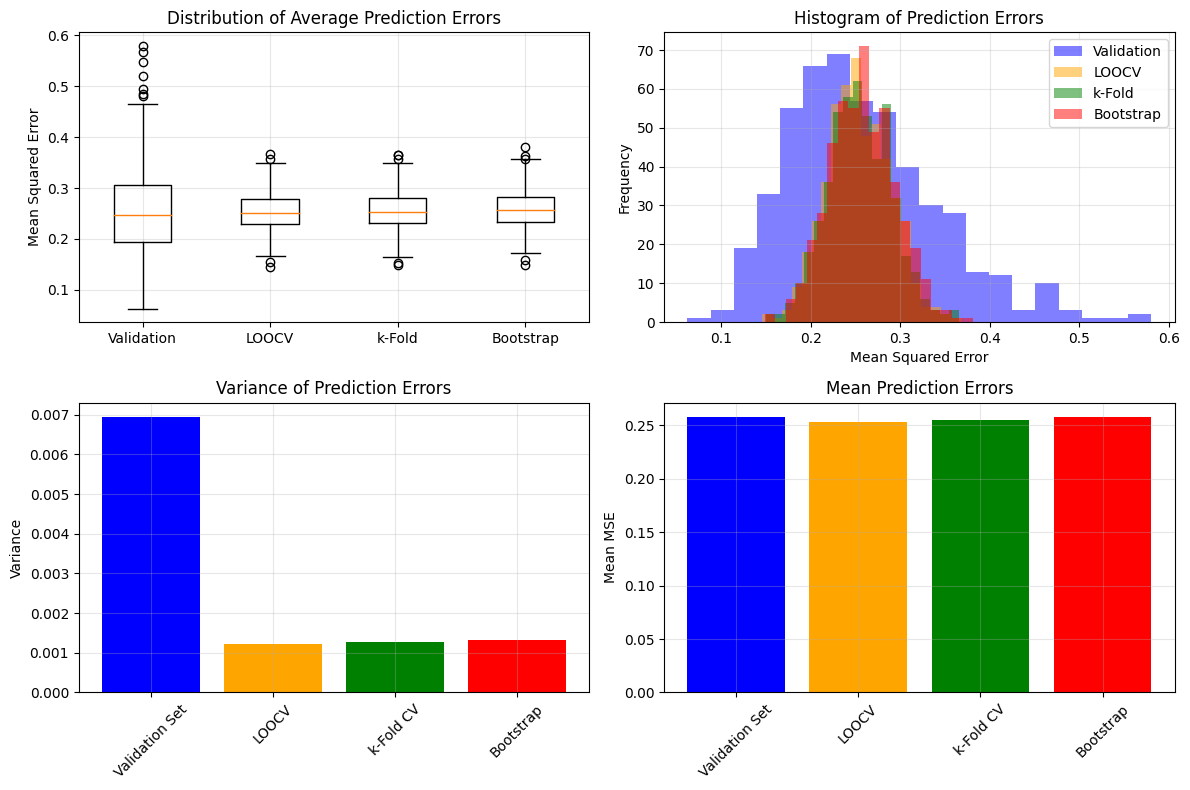

In [11]:
plt.figure(figsize=(12, 8))

# Boxplot of errors by method
plt.subplot(2, 2, 1)
plt.boxplot([validation_errors, loocv_errors, kfold_errors, bootstrap_errors], 
            labels=['Validation', 'LOOCV', 'k-Fold', 'Bootstrap'])
plt.title('Distribution of Average Prediction Errors')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)

# Histogram of errors for each method
plt.subplot(2, 2, 2)
for errors, label, color in zip(
    [validation_errors, loocv_errors, kfold_errors, bootstrap_errors],
    ['Validation', 'LOOCV', 'k-Fold', 'Bootstrap'],
    ['blue', 'orange', 'green', 'red']
):
    plt.hist(errors, alpha=0.5, bins=20, label=label, color=color)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Variance comparison bar chart
plt.subplot(2, 2, 3)
methods = list(error_variances.keys())
variances = list(error_variances.values())
plt.bar(methods, variances, color=['blue', 'orange', 'green', 'red'])
plt.title('Variance of Prediction Errors')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, alpha=0.3)

# Error means comparison
plt.subplot(2, 2, 4)
means = list(error_means.values())
plt.bar(methods, means, color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Prediction Errors')
plt.ylabel('Mean MSE')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Theoretical discussion

In [12]:
print("\nTheoretical Analysis:")
print("1. Validation Set Approach:")
print("   - Variance sources: Random split into train/test, limited test set size")
print("   - Expected to have high variance due to sensitivity to the specific split")
print("\n2. LOOCV:")
print("   - Variance sources: Uses almost all data for training, less variation in model estimates")
print("   - Expected to have lower variance in model estimates but potentially higher variance in error estimates")
print("\n3. k-Fold CV:")
print("   - Variance sources: Multiple random splits, averaging across folds")
print("   - Expected to have moderate variance, balancing the use of different folds")
print("\n4. Bootstrap:")
print("   - Variance sources: Random sampling with replacement, varying OOB samples")
print("   - Expected to have higher variance due to the randomness in bootstrap sampling")


Theoretical Analysis:
1. Validation Set Approach:
   - Variance sources: Random split into train/test, limited test set size
   - Expected to have high variance due to sensitivity to the specific split

2. LOOCV:
   - Variance sources: Uses almost all data for training, less variation in model estimates
   - Expected to have lower variance in model estimates but potentially higher variance in error estimates

3. k-Fold CV:
   - Variance sources: Multiple random splits, averaging across folds
   - Expected to have moderate variance, balancing the use of different folds

4. Bootstrap:
   - Variance sources: Random sampling with replacement, varying OOB samples
   - Expected to have higher variance due to the randomness in bootstrap sampling


### Summary and recommendations

In [13]:
print("\nSummary and Recommendations:")
print("1. Based on the simulation results, the method with the highest variance is:", max_var_method[0])
print("\n2. Recommended method for future evaluation:")
print("   - For general purposes: k-Fold CV offers a good balance between bias and variance")
print("   - For smaller datasets: LOOCV might be preferred for its efficient use of data")
print("   - If robust confidence intervals are needed: Bootstrap provides better uncertainty quantification")
print("   - If computational efficiency is critical with large datasets: Validation set approach is simplest")


Summary and Recommendations:
1. Based on the simulation results, the method with the highest variance is: Validation Set

2. Recommended method for future evaluation:
   - For general purposes: k-Fold CV offers a good balance between bias and variance
   - For smaller datasets: LOOCV might be preferred for its efficient use of data
   - If robust confidence intervals are needed: Bootstrap provides better uncertainty quantification
   - If computational efficiency is critical with large datasets: Validation set approach is simplest
